# Problem Statement:
Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ You are the business owner of the retail firm and want to see how your company is performing.
You are interested in finding out the weak areas where you can work to make more profit.What all business problems you can derive by looking into the data? 
You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel)

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
df=pd.read_csv("C:\\Users\\karthick\\Downloads\\SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# plotting

Text(0, 0.5, 'Number of orders')

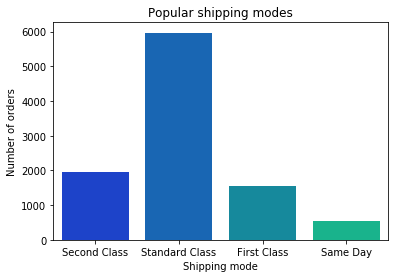

In [7]:
sns.countplot('Ship Mode',data=df,palette='winter')
plt.title('Popular shipping modes')
plt.xlabel('Shipping mode')
plt.ylabel('Number of orders')

In [8]:
# Checking Null Values
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
corr=df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


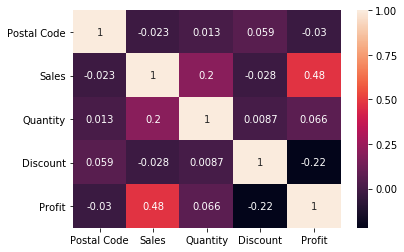

In [11]:
sns.heatmap(corr,annot=True)

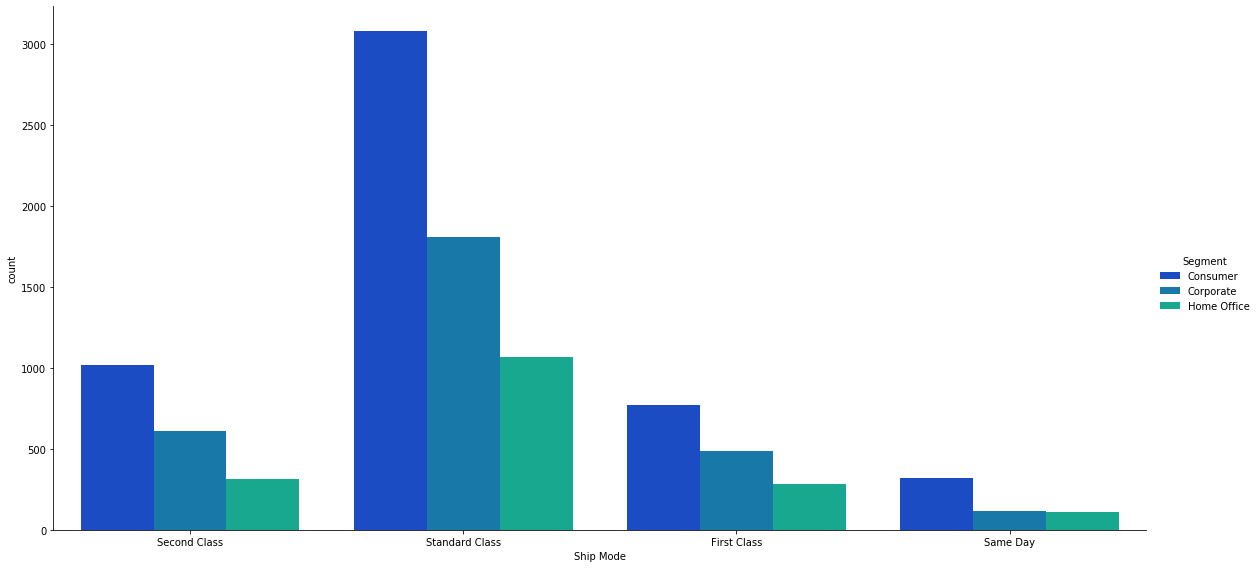

In [12]:
sns.catplot('Ship Mode',data=df,hue='Segment',kind='count',palette='winter',aspect=2,height=8)

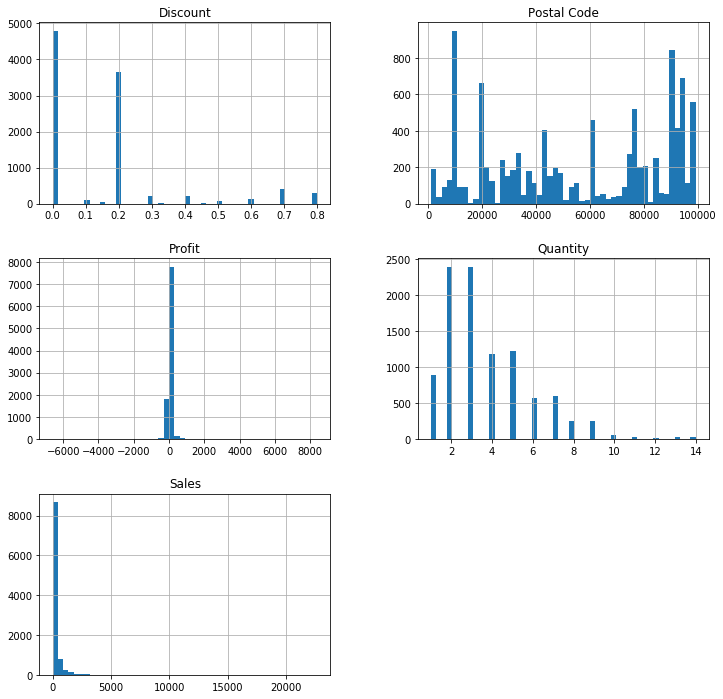

In [13]:
df.hist(figsize=(12,12),bins=50)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

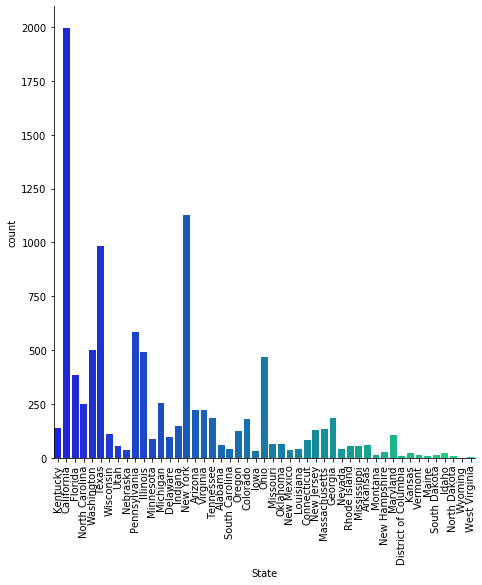

In [19]:
figure=figsize=(10,5)
sns.catplot('State',kind='count',data=df,palette='winter',height=7,aspect=1)
plt.xticks(rotation=90)

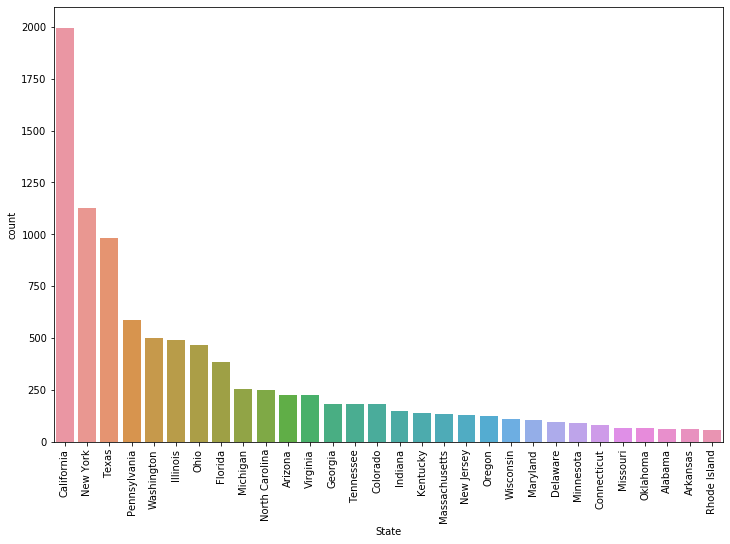

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(df['State'],order=(df['State'].value_counts().head(30)).index)
plt.xticks(rotation=90)
plt.show()

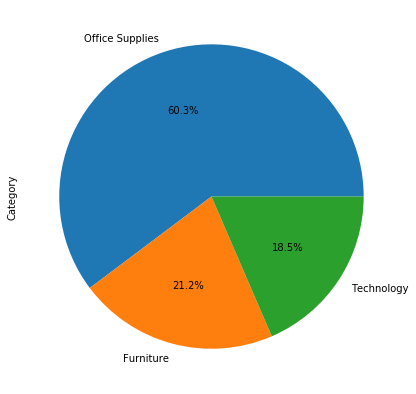

In [22]:
plt.figure(figsize=(12,7))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

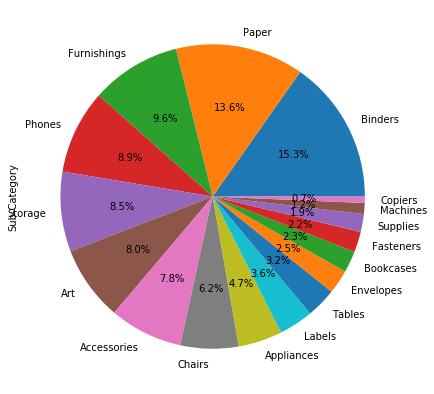

In [23]:
plt.figure(figsize=(12,7))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [24]:
df_items=df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df_items.reset_index(drop=True,inplace=True)

# Items that contribute the most and the leas

Text(0.5, 6.800000000000029, 'Products')

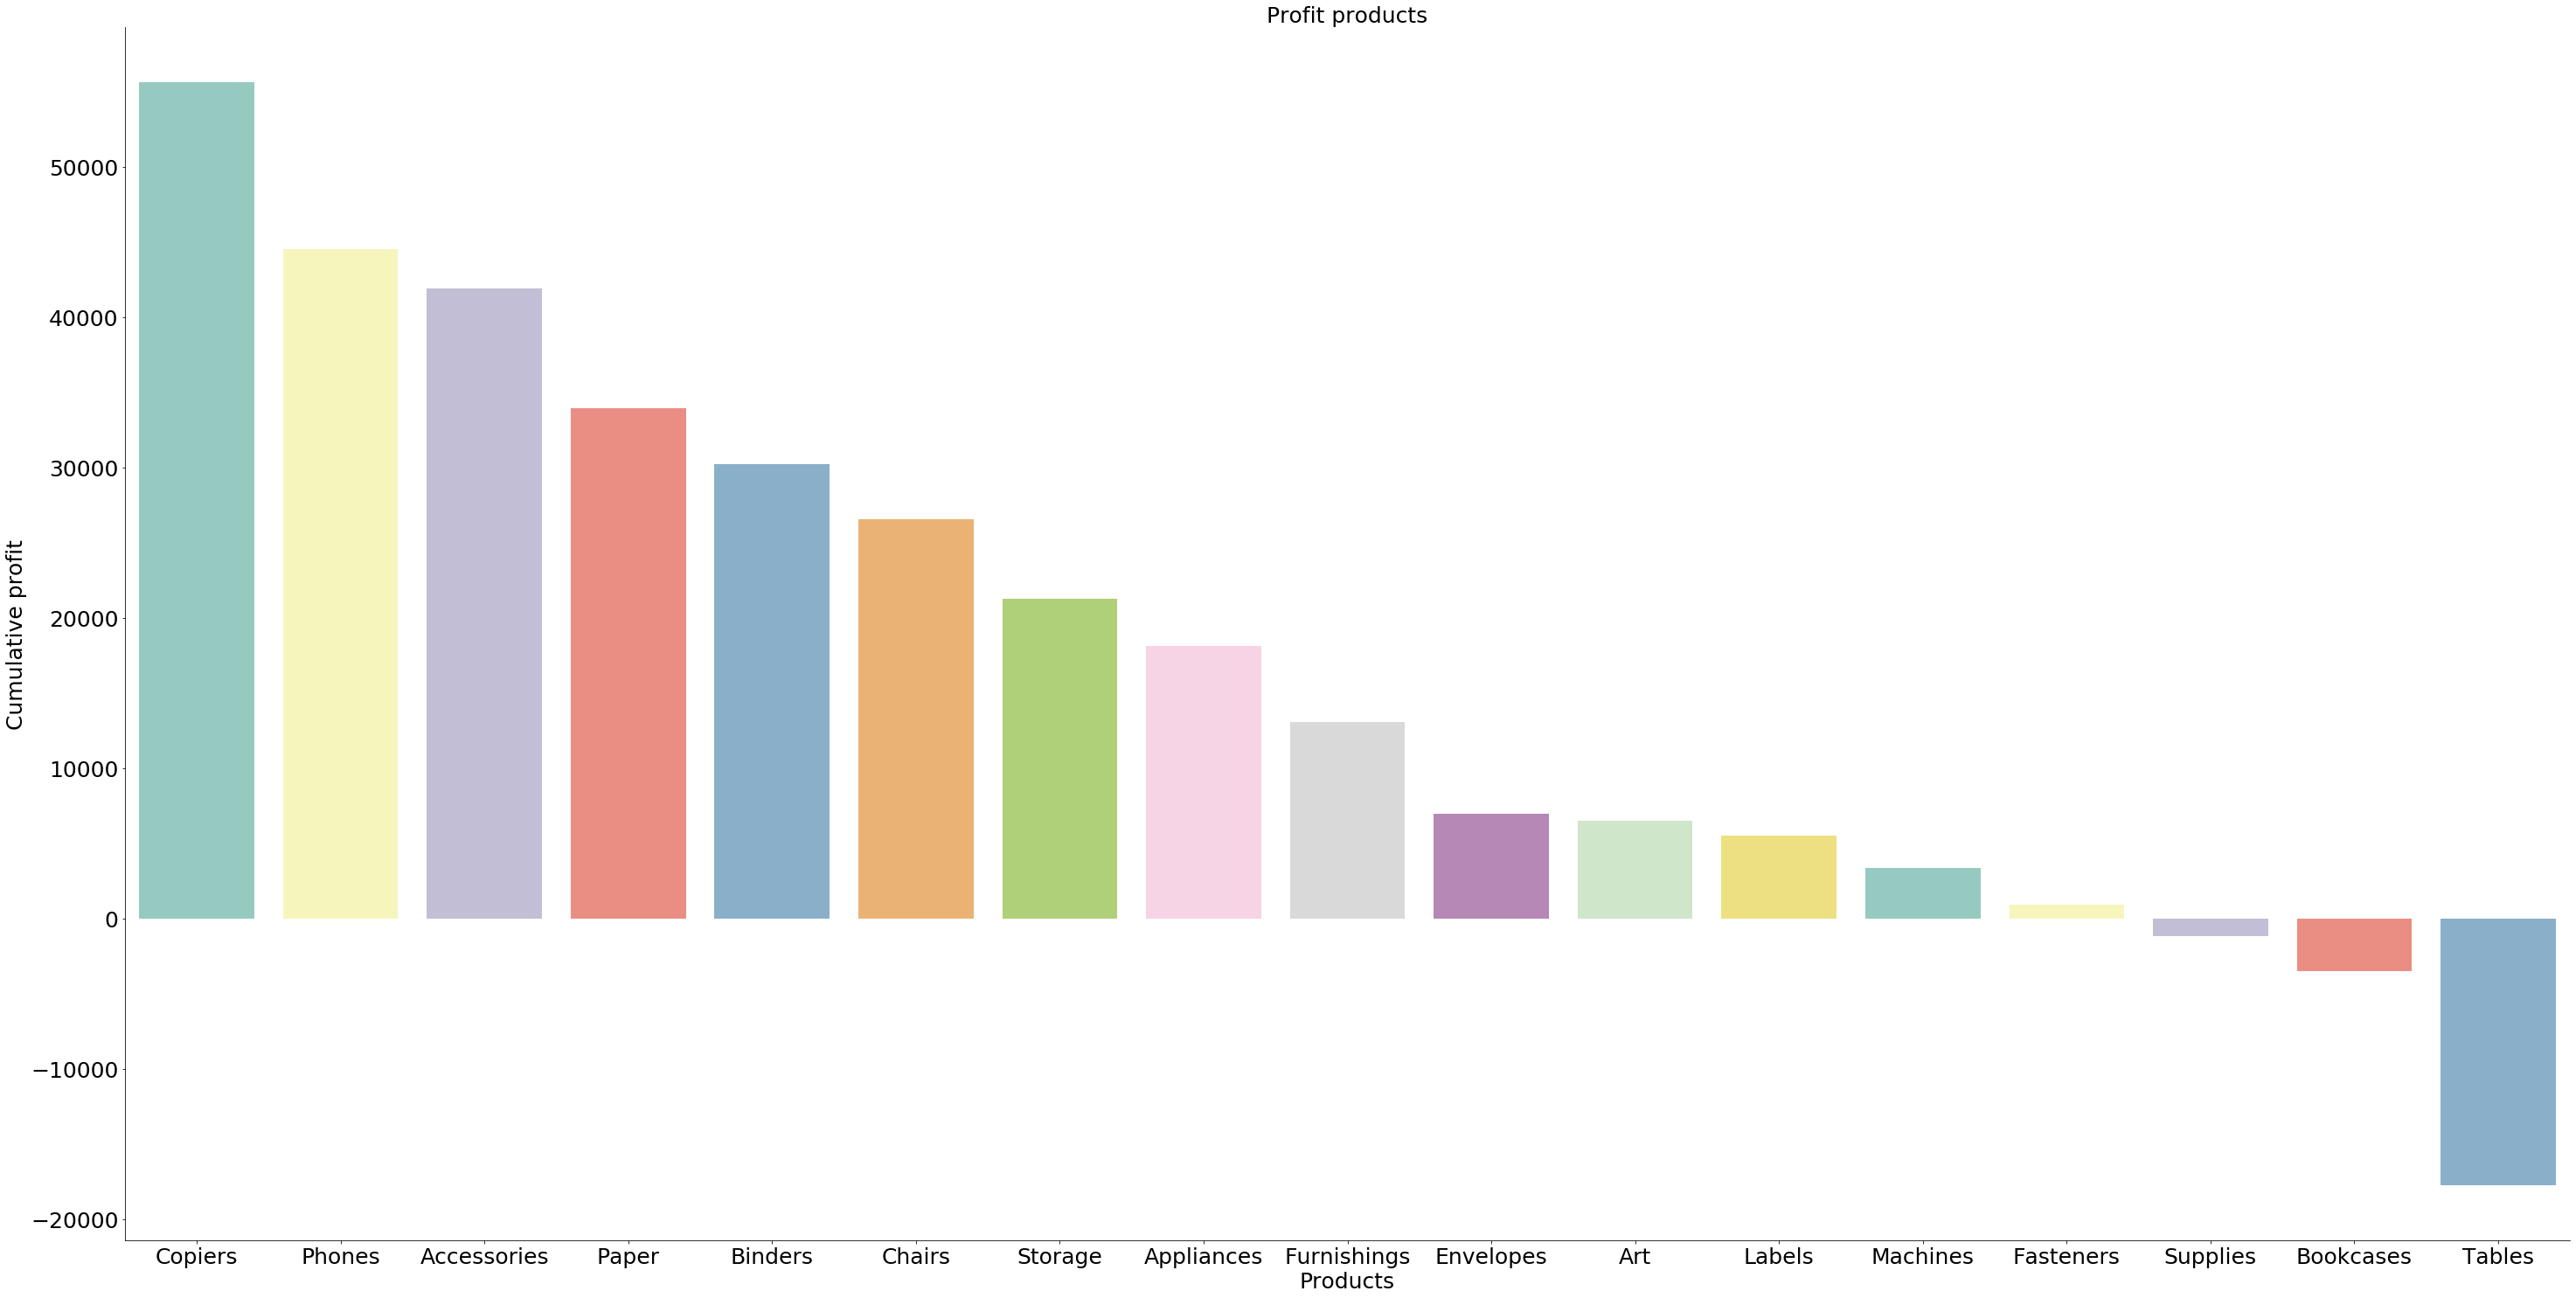

In [36]:
sns.catplot('Sub-Category','Profit',data=df_items,kind='bar',aspect=2,height=20,palette='Set3')
plt.title('Profit products',size=25)
plt.xticks(size=25)
plt.yticks(size=25)
plt.ylabel('Cumulative profit',size=25)
plt.xlabel('Products',size=25)